In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.image as mpimg
import splitfolders
import cv2
import glob



In [2]:

# FIXING IMAGES EXTENSIONS

for name in glob.glob("/car_plates/Pics/*"):
    if '.JPG' in name:
        os.rename(name,name.replace('JPG','jpg'))

# splitfolders.ratio(input="/car_plates/", output="output", seed=1337, ratio=(.8, 0.1,0.1))

dataset=pd.read_csv(r'/car_plates/PoolLabels.csv')
dataset.head()

,img.name,label
0,car001.jpg,ر ب ل ١ ٨ ٢ ٧
1,car002.jpg,ى ن ر ٤ ٦ ٢ ٥
2,car003.jpg,ع س ط ١ ٣ ٧ ٥
3,car004.jpg,أ ج س ٤ ١ ٤ ٧
4,car005.jpg,ق ج ل ٢ ٧ ٣ ٩


In [3]:
# FUNCTION TO REFORMAT THE LABELS IN DATASET

def formatLabels(labels):
    count = 0
    labels = labels.apply(lambda x: x.replace(' ',''))
    labels = labels.apply(lambda x: x + "+"*(7-len(x)))
    labels = labels.apply(lambda x: list(x))        
    return labels

# FUNCTION TO REFORMAT THE IMAGES NAMES IN DATASET


def checkName(name):
    if 'JPG' in name:
        return name.replace('JPG','jpg')
    elif '.jpg' not in name:
        return name + '.jpg'
    else:
        return name
    
# RUNNING BOTH FUNCTIONS ON DATASET    
    
dataset['img.name']=dataset['img.name'].apply(checkName)
dataset['label'] = formatLabels(dataset.label)    

In [4]:
from keras.layers import StringLookup

arabic_num_alph={
    "١":'1',
    "٢":'2',
    "٣":'3',
    "٤":'4',
    "٥":'5',
    "٦":'6',
    "٧":'7',
    "٨":'8',
    "٩":'9',
    '+':'0',
    "أ":'11',
    'ص':'12',
    'ف':'13',
    'ل':'14',
    'ح':'15',
    'س':'16',
    'د':'17',
    'ي':'18',
    'ر':'19',
    'ز':'19',
    'ن':'20',
    'ك':'21',
    "ب":'22',
    'ط':'23',
    'ا':'11',
    'ج':'24',
    'ى':'18',
    'م':'25',
    'ق':'26',
    'ع':'27', 
    'ه':'28',
    "و":'29'
            }


# MAKING ARABIC LETTERS AND NUMBERS TO ENGLISH NUMBERS AS SYMBOLS

for index, label in enumerate(dataset['label']):
    for char in label:
        if(char in arabic_num_alph.keys()):    
            # label=  list(map(lambda x: x.replace(char, arabic_num_alph.get(char)), label))
            i = label.index(char)
            label=label[:i]+[arabic_num_alph.get(char)]+label[i+1:]
            dataset['label'][index]=label
        else:
            
            dataset = dataset.drop(index=index)
            break
           
            
        
    
            
# ONE HOT ENCODIN THE LABELS INTO MATRIX(7,30)

for index, label in enumerate(dataset['label']):
    matrix = np.zeros(shape=(7,30))
    for char in label:
        i = label.index(char)
        column=int(char)
        matrix[i][column]=1
    dataset['label'][index]=matrix
print(index)        
            
          
# label 2000 IS CORRUPTED


2725


In [5]:
directory='/car_plates/Pics/'
img_path=[]

for index,imgN in enumerate(dataset['img.name']):
    try:
        img_path.append(directory+dataset['img.name'][index])
    except:
        print(index)
        continue    
print(index)    

100
1771
2051
2052
2053
2057
2058
2059
2060
2061
2062
2063
2091
2118
2129
2135
2152
2153
2246
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2725


In [6]:
img_path[100]

'/car_plates/Pics/car102.jpg'

In [7]:
# Path to the data directory
# from pathlib import Path


# data_dir = Path("./Pics/")

# # Get list of all the images
# images = sorted(list(map(str, list(data_dir.glob("*.jpg")))))


In [8]:
config_img=[]
count=0
for i in range(img_path.__len__()):
    try:
        img=cv2.imread(img_path[count])
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(128,64))
        config_img.append(img)
        count=count+1
    except:
        print(img_path[count])
        count=count+1
        continue    


/car_plates/Pics/4_Aa.jpg
/car_plates/Pics/5_Aa.jpg
/car_plates/Pics/6_Aa.jpg


c:\anaconda3\envs\tf2.4\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[[35 35 35 ... 28 28 29]
 [30 30 30 ... 28 28 29]
 [25 25 24 ... 27 28 29]
 ...
 [29 28 28 ... 34 35 36]
 [34 34 33 ... 31 31 32]
 [45 44 39 ... 30 30 30]]


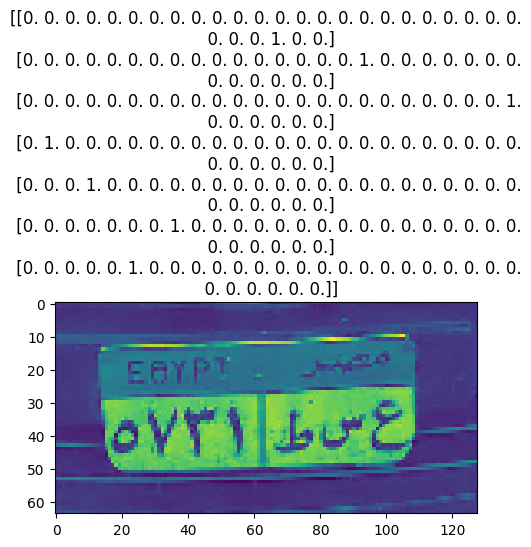

In [9]:
from PIL import Image
plt.figure(figsize = (12,10))
plt.subplot(1,2,1)

plt.title(dataset['label'][2])
plt.imshow(config_img[2])
print(config_img[2])

In [10]:


x_train,x_test,y_train,y_test=train_test_split(config_img,dataset['label'],train_size=0.5)


ValueError: Found input variables with inconsistent numbers of samples: [2554, 2726]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
   
    fill_mode='nearest'
    )
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=dataset,
    directory=directory,
                  x_col='img.name',
                  y_col='label',
                #   target_size =(300, 300),  # target_size = input image size
                
                  )

# # train_generator= train_datagen.flow_from_directory(
# #   x_train
  
# # )

# # test_generator = test_datagen.flow_from_dataframe(
# #                     x_test,
# #                     target_size =(150, 150),
# #                     batch_size = 20,
# #                     class_mode ='binary')

NameError: name 'directory' is not defined

In [ ]:
from keras.layers import Activation, Dense

model =tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3,3), activation='relu' ,
 input_shape=(256, 256, 3)),
 tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dense(1, activation='softmax'),
 tf.keras.layers.Dense(1, activation='softmax'),
 tf.keras.layers.Dense(1, activation='softmax'),
 tf.keras.layers.Dense(1, activation='softmax'),
 tf.keras.layers.Dense(1, activation='softmax'),
 tf.keras.layers.Dense(1, activation='softmax'),
 tf.keras.layers.Dense(1, activation='softmax'), 
  
 ])




In [ ]:
model.compile(loss='categorical_crossentropy',
 optimizer='adam',
# RMSprop(lr=0.001)
 metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.fit(
    train_generator,
    
    
    epochs=20,
    )

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/sequential/dense_8/MatMul/MatMul' defined at (most recent call last):
    File "c:\anaconda3\envs\tf2.4\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\anaconda3\envs\tf2.4\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\anaconda3\envs\tf2.4\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "c:\anaconda3\envs\tf2.4\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "c:\anaconda3\envs\tf2.4\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_7044\985314521.py", line 1, in <module>
      model.fit(
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\engine\training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/sequential/dense_8/MatMul/MatMul'
Matrix size-incompatible: In[0]: [32,50], In[1]: [1,1]
	 [[{{node gradient_tape/sequential/dense_8/MatMul/MatMul}}]] [Op:__inference_train_function_3047]